## Text Analytics Assignment 


__Team__ 

__Name__ : Sundar Balasubramanian
__PG ID__: 11810130

__Name__  : Gopinath Thulasidoss
__PG ID__ : 11810136

__Name__  : Karthikeyan Thirumal
__PG ID__: 11810131

## Text Classification

Task:
1. Assignment_2_Data_Preparation Script will create results-text-clssification.csv after data extraction for each URL 
2. Read the results-text-clssification.csv and load it into Data Frame
3. Contruct DTM using CountVectorizer Function without cleaning the data (Text Column)
4. Perform Model Execution Logistic Regression and naive_bayes and check the accuracy
5. Clean the Text Data by executing lemmatizeSentences Function
6. Contruct DTM using CountVectorizer Function again
7. Perform Model Execution Logistic Regression and naive_bayes and check the accuracy. DO analysis whether the accuracy got changed or not
8. Let use Weighted Count instead of normal word counts. Using TF-IDF(Term freuency - inverse document frequency) TfidfVectorizer and create feature
9. Perform Model Execution Logistic Regression and naive_bayes and check the accuracy
10. Use LatentDirichletAllocation and create feature4 by using DTM (Feature2)
11. Perform Model Execution Logistic Regression and naive_bayes and check the accuracy

In [93]:
# import the required libraries

import pandas as pd
import re

from sklearn.decomposition import LatentDirichletAllocation,PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# Gettnig rid of unnecessary warnings
import warnings; 
warnings.simplefilter('ignore')


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix

In [94]:
data_original = pd.read_csv("results-text-clssification.csv")

In [95]:
data_original.head()

,Text,Category
0,\n,Cricket
1,Cricket is a bat-and-ball game played between ...,Cricket
2,There are various formats ranging from Twenty2...,Cricket
3,"Historically, cricket's origins are uncertain ...",Cricket
4,\n,Cricket


In [96]:
categories = list(data_original['Category'].drop_duplicates())

In [97]:
integers = list(range(1,5))
category_id = dict(zip(categories,integers))
rev_category_id = inv_map = {v: k for k, v in category_id.items()}
category_id

{'Cricket': 1, 'Movie': 2, 'Technology': 3, 'Health': 4}

In [98]:
data = data_original
data['id'] = data['Category'].map(category_id)
data = data.drop(columns=['Category'])
data.head()

,Text,id
0,\n,1
1,Cricket is a bat-and-ball game played between ...,1
2,There are various formats ranging from Twenty2...,1
3,"Historically, cricket's origins are uncertain ...",1
4,\n,1


In [99]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenising

Tokenisation at 2 levels - word and sentence. To construct Document term frequency matrix (DTM) we need the word counts. 

In [100]:
sent_tokenize(data['Text'][1])

['Cricket is a bat-and-ball game played between two teams of eleven players on a field at the centre of which is a 20-metre (22-yard) pitch with a wicket at each end, each comprising two bails balanced on three stumps.',
 'The batting side scores runs by striking the ball bowled at the wicket with the bat, while the bowling and fielding side tries to prevent this and dismiss each player (so they are "out").',
 'Means of dismissal include being bowled, when the ball hits the stumps and dislodges the bails, and by the fielding side catching the ball after it is hit by the bat, but before it hits the ground.',
 'When ten players have been dismissed, the innings ends and the teams swap roles.',
 'The game is adjudicated by two umpires, aided by a third umpire and match referee in international matches.',
 "They communicate with two off-field scorers who record the match's statistical information."]

In [101]:
vectorizer = CountVectorizer(min_df = 0.05 , max_df= 0.95, stop_words="english")
features1 = pd.DataFrame(vectorizer.fit_transform(data['Text']).toarray(),columns=vectorizer.get_feature_names())
features1.head()

,based,began,called,century,cinema,considered,cricket,day,development,early,...,science,social,team,technology,time,use,used,work,world,years
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,1,3,0,0,6,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(features1, data['id'],test_size=0.30)



In [103]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
model.score(X_test,y_test)

0.8881578947368421

In [105]:
cross_val_score(model,features1, data['id'].astype('int'),cv=4).mean()

0.8794902608907854

Text Processing

Cleaning the text and removing unwanted words.

In [106]:
def cleanText(text):
    text = re.sub('[^ a-zA-Z]','',text)
    text = re.sub(r' +', ' ', text)
    return text

wnl = WordNetLemmatizer()
def lemmatizeSentences(data):
    count = 0
    for text in data:
        # clean the text
        text = cleanText(text)
        sentence = ""
        for i, j in pos_tag(word_tokenize(text)):
            word = ''
            if j[0].lower() in ['n', 'v', 'r']:
                word = wnl.lemmatize(i, j[0].lower())
            elif j[0].lower() is 'j':
                word = wnl.lemmatize(i, 'a')
            else:
                word = wnl.lemmatize(i)
            sentence = sentence + " " + word.lower()
        data[count] = sentence
        count = count + 1;

    return data

In [107]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sundar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
start = time.time()
data['Text'] = lemmatizeSentences(data['Text'])
end = time.time()
print(end - start)


126.47371649742126


In [109]:
data['Text'].head()

0                                                     
1     cricket be a batandball game play between two...
2     there be various format range from twenty pla...
3     historically cricket origin be uncertain and ...
4                                                     
Name: Text, dtype: object

Breaking the cleaned text into individual terms. Let's build simple frequency table. The below results shows how many times each token occurred in each document.

We used inbuilt functions in scikit-learn to construct DTMs. Document-Token-Matrix

In [110]:
vectorizer = CountVectorizer(min_df = 0.05 , max_df= 0.95, stop_words="english")
features2 = pd.DataFrame(vectorizer.fit_transform(data['Text']).toarray(),columns=vectorizer.get_feature_names())

features2.head()

,allow,base,begin,century,cinema,consider,country,cricket,develop,development,...,science,social,team,technology,th,time,use,work,world,year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,3,0,0,0,0,0,0,0
3,0,0,0,3,0,0,2,6,0,0,...,0,0,0,0,2,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the data into Train & Test using train_test_split funtion (In Build Function in scikit-learn

In [111]:
X_train, X_test, y_train, y_test = train_test_split(features2, data['id'],test_size=0.30)

## Why 0.3??

Check the accuracy after executing LogisticRegression Model

In [112]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Accuracy of test sample

In [113]:
model.score(X_test,y_test)

0.912828947368421

Cross validation accuracy

In [114]:
cross_val_score(model,features2, data['id'],cv=4).mean()

0.8883641127416747

Check the accuracy after executing naive bayes

In [115]:
X_train, X_test, y_train, y_test = train_test_split(features2,data.iloc[:,-1])
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)


0.893491124260355

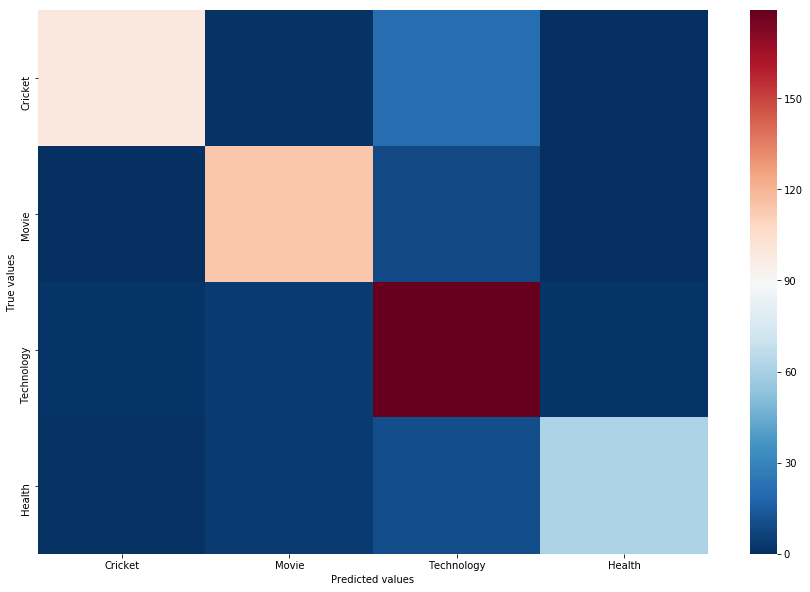

In [116]:

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

In [117]:
y_train.head()

645     2
1068    3
677     2
1130    3
624     2
Name: id, dtype: int64

In [118]:
X_train.head()

,allow,base,begin,century,cinema,consider,country,cricket,develop,development,...,science,social,team,technology,th,time,use,work,world,year
645,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1068,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
677,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
624,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
X_test.head()

,allow,base,begin,century,cinema,consider,country,cricket,develop,development,...,science,social,team,technology,th,time,use,work,world,year
780,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
651,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [120]:
y_test.head()

780     2
651     2
683     2
1533    3
20      1
Name: id, dtype: int64

In [121]:
print(y_train.count())
print(y_test.count())


1518
507


Normalizing

Use the TfidfVectorizer to generate weighted counts of vocabulary

In [122]:
tfidfvectorizer = TfidfVectorizer(min_df=0.05,max_df=0.95,stop_words="english")
features3 = pd.DataFrame(tfidfvectorizer.fit_transform(data['Text']).toarray(),columns=tfidfvectorizer.get_feature_names())

features3.head()

,allow,base,begin,century,cinema,consider,country,cricket,develop,development,...,science,social,team,technology,th,time,use,work,world,year
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.171734,0.0,0.0,...,0.0,0.0,0.374291,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.209784,0.0,0.0,...,0.0,0.0,0.685830,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.257765,0.0,0.0,0.221467,0.565027,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.179099,0.0,0.0,0.0,0.095708,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


Check the accuracy after executing LogisticRegression Model

In [123]:
X_train, X_test, y_train, y_test = train_test_split(features3, data['id'],test_size=0.30)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9078947368421053

In [124]:
cross_val_score(model,features3, data['id'],cv=4).mean()

0.8844076301368925

Check the accuracy after executing Naive Bayes

In [125]:
X_train, X_test, y_train, y_test = train_test_split(features3,data.iloc[:,-1])
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.9230769230769231

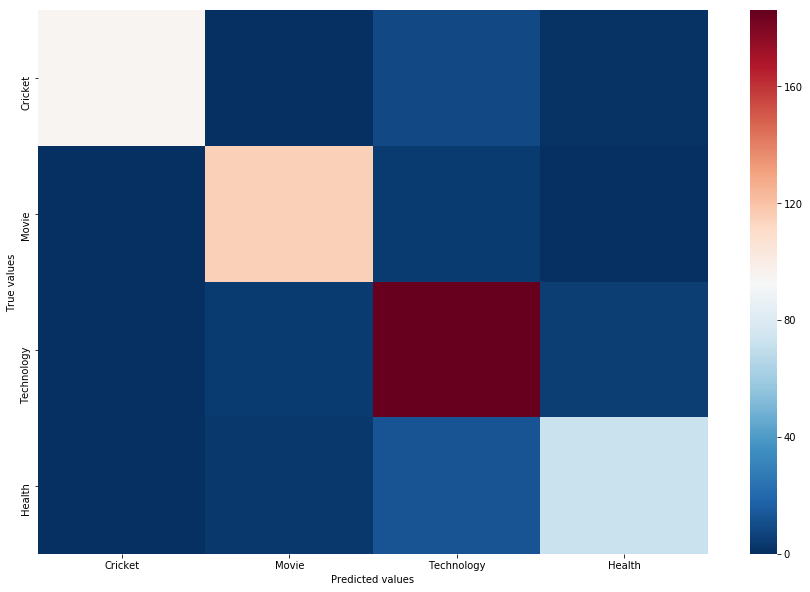

In [126]:

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

LDA to deduct topics for each document. Each document contains number of topics. each Topic contains dstribution of words associated with it. We need to concentrate on distribution of words. LDA basic assumptions is Word in each document are related. It tries to identify the receipe for how  each document could have been created.  We need to tell model how many topics to construct. In this example , it is 4. It uses the recipe to generate topic and word distributions over corpus. Based on the output, we can identify similar documents within the corpus. Other Bags of Words focus about count of each word. 

In [134]:
lda = LatentDirichletAllocation(n_components=4)

features4 = pd.DataFrame(lda.fit_transform(features2))
features4.head()

,0,1,2,3
0,0.250000,0.250000,0.250000,0.250000
1,0.016820,0.949288,0.016669,0.017223
2,0.025023,0.924427,0.025437,0.025113
3,0.425856,0.557722,0.008208,0.008214
4,0.250000,0.250000,0.250000,0.250000


In [135]:
data['id'].head()

0    1
1    1
2    1
3    1
4    1
Name: id, dtype: int64

In [136]:
topic0 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=0,ascending=False).iloc[:,0].head(10)
topic1 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=1,ascending=False).iloc[:,1].head(10)
topic2 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=2,ascending=False).iloc[:,2].head(10)
topic3 = pd.DataFrame(lda.components_.transpose(),index = features2.columns).sort_values(by=3,ascending=False).iloc[:,3].head(10)

pd.DataFrame([topic0.index,topic1.index,topic2.index,topic3.index]).transpose()

,0,1,2,3
0,century,cricket,film,health
1,th,play,use,include
2,world,match,make,public
3,country,team,industry,social
4,year,run,industrial,allow
5,increase,end,technology,work
6,lead,game,production,science
7,international,form,cinema,need
8,new,international,produce,base
9,develop,time,revolution,important


Check the accuracy after executing LogisticRegression Model 

In [137]:
X_train, X_test, y_train, y_test = train_test_split(features4, data['id'],test_size=0.30)
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6710526315789473

In [138]:
cross_val_score(model,features4, data['id'],cv=4).mean()

0.6810391699458662

Check the accuracy after executing Naive Bayes

In [139]:
X_train, X_test, y_train, y_test = train_test_split(features4,data.iloc[:,-1])
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Prediction accuracy on test dataset
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.5996055226824457

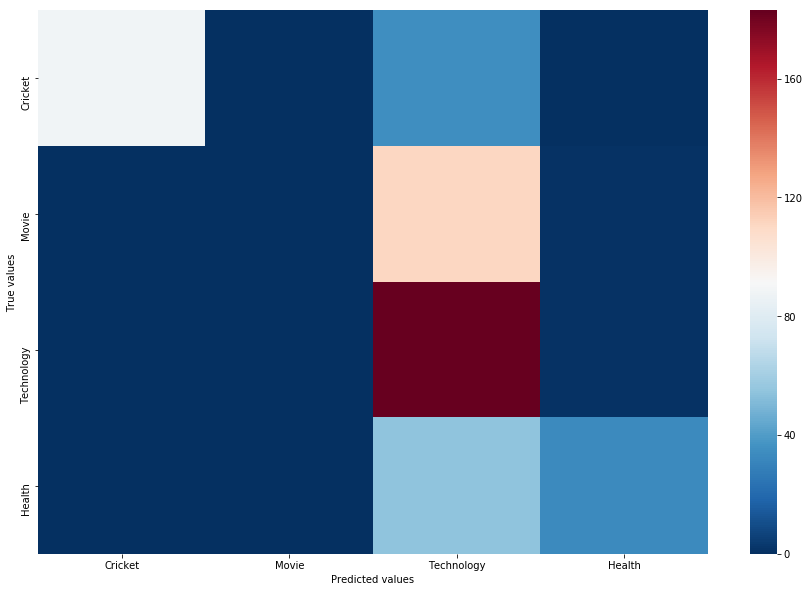

In [140]:

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat , cmap="RdBu_r", xticklabels = categories, yticklabels = categories)
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()